MLP for NLP
------

Train and evaluate a simple MLP on the Reuters newswire topic classification task.

Dataset of 11,228 newswires from Reuters, labeled over 46 topics. 

As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions).

In [1]:
reset -fs

In [2]:
import numpy as np
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import reuters

In [4]:
print('Loading data...')
max_words = 1000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
8982 train sequences
2246 test sequences


In [83]:
from keras.preprocessing.text import Tokenizer

In [84]:
print('Vectorizing sequence data...')
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Vectorizing sequence data...


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [86]:
x_train = x_train.reshape(8982, 1000)
x_test = x_test.reshape(2246,1000)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [87]:
x_train[:,0].shape

(8982,)

In [98]:
y_train[0]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [88]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

2.0 classes


In [89]:
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [64]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [90]:
y_train = y_train.reshape(8982, 46)
y_test = y_test.reshape(2246, 46)
print('y_train shape:', x_train.shape)
print('y_test shape:', x_test.shape)

y_train shape: (8982, 1000)
y_test shape: (2246, 1000)


In [91]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding

In [94]:
num_classes

2.0

# Baseline


In [130]:
print('Building model...')

model = Sequential()
#model.add(Embedding())
model.add(Dense(128,input_shape=(1000,))) # TODO: Add Dense layer. How big should input_shape being?
model.add(Activation('relu')) # TODO: Add Activation
model.add(Dense(46)) # TODO: Add Dense layer that matches output shape?
model.add(Activation('softmax')) # TODO: Add Activation to "squashes" the activation values
model.summary()

Building model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 128)               128128    
_________________________________________________________________
activation_55 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 46)                5934      
_________________________________________________________________
activation_56 (Activation)   (None, 46)                0         
Total params: 134,062.0
Trainable params: 134,062.0
Non-trainable params: 0.0
_________________________________________________________________


In [131]:
print("Training model...")

model.compile(loss='binary_crossentropy', # TODO: What should the loss function be?
              optimizer='SGD',
              metrics=['accuracy'])

batch_size = 32
epochs = 5

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=True,
                    validation_split=0.1)

Training model...
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s - loss: 0.1031 - acc: 0.9783 - val_loss: 0.1020 - val_acc: 0.9783

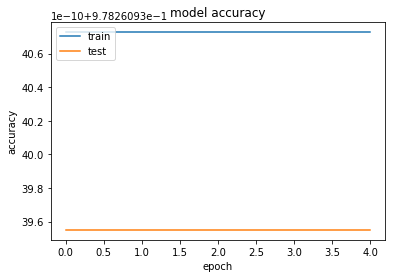

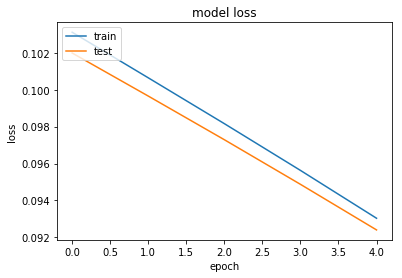

In [132]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Optimized model

In [99]:
print('Building model...')

model = Sequential()
#model.add(Embedding())
model.add(Dense(128,input_shape=(1000,))) # TODO: Add Dense layer. How big should input_shape being?
model.add(Activation('relu')) # TODO: Add Activation
model.add(Dense(46)) # TODO: Add Dense layer that matches output shape?
model.add(Activation('softmax')) # TODO: Add Activation to "squashes" the activation values
model.summary()

Building model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 128)               128128    
_________________________________________________________________
activation_51 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 46)                5934      
_________________________________________________________________
activation_52 (Activation)   (None, 46)                0         
Total params: 134,062.0
Trainable params: 134,062.0
Non-trainable params: 0.0
_________________________________________________________________


In [107]:
print("Training model...")

model.compile(loss='binary_crossentropy', # TODO: What should the loss function be?
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 32
epochs = 5

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=True,
                    validation_split=0.1)

Training model...
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s - loss: 0.0067 - acc: 0.9979 - val_loss: 0.0364 - val_acc: 0.9909

In [111]:
score, accuracy = model.evaluate(x_test, y_test,
                                batch_size=batch_size, 
                                verbose=True)

print('Test score: {:.3}'.format(score))
print('Test accuracy: {:.3}'.format(accuracy))

2176/2246 [============================>.] - ETA: 0sTest score: 0.0399
Test accuracy: 0.991


In [112]:
import matplotlib.pyplot as plt

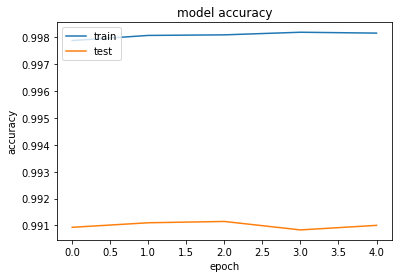

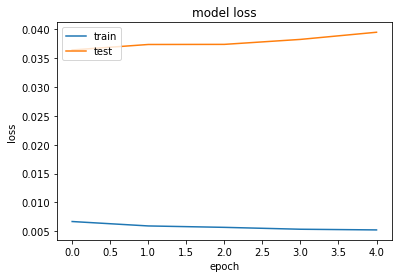

In [113]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

__TODO__: What is baseline peformance? How does this simple model do?

In [ ]:
# The baseline would be 36% if you guessed randomly. 

In [124]:
sum(y_test.sum(axis=0)) # total number of classes

2246.0

In [126]:
y_test.sum(axis=0)/sum(y_test.sum(axis=0))*100 # baseline

array([  0.53428317,   4.67497774,   0.89047195,  36.19768477,
        21.10418522,   0.22261799,   0.62333037,   0.13357079,
         1.69189671,   1.11308994,   1.33570793,   3.69545859,
         0.57880677,   1.64737311,   0.0890472 ,   0.40071238,
         4.40783615,   0.53428317,   0.89047195,   5.92163847,
         3.11665183,   1.20213713,   0.31166518,   0.53428317,
         0.84594835,   1.38023152,   0.35618878,   0.17809439,
         0.44523598,   0.17809439,   0.53428317,   0.57880677,
         0.44523598,   0.22261799,   0.31166518,   0.26714159,
         0.48975957,   0.0890472 ,   0.13357079,   0.22261799,
         0.44523598,   0.35618878,   0.13357079,   0.26714159,
         0.22261799,   0.0445236 ])

__TODO__: Spend a little bit of time tuning hyperparameters. What do you find?

In [114]:
# The model performs a lot better with binary cross entropy instead of categorical cross entropy.
# In addition, using adam improves performance as well.

<br>
<br> 
<br>

----